In [1]:
userName='SampleID'
Password = 'SamplePassword'

In [2]:
#importing important modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from collections import OrderedDict 
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [8]:
driver=webdriver.Chrome()
driver.maximize_window()

driver.get("https://www.instagram.com")
wait= WebDriverWait(driver,10)



In [9]:
#Login_To_Insta() function is same as part-I. All the functionality is same as before. It is used to Login Instagram Handle
"""
Here I have visited the site and then I found the input fields where I will need to 
input the user name and the password and then I have passed the inputs with the
send key function. Once these two fields are filled with correct username and password
I just clicked on the login button which I have found using button tag then.
"""

def LogIn(username, password):
    # Locating username textbox and sending username
    user_name = wait.until(EC.presence_of_element_located((By.NAME, "username")))
    user_name.send_keys(username)

    # Locating password box and sending password
    password_box = wait.until(EC.presence_of_element_located((By.NAME, "password")))
    password_box.send_keys(password)

    # Locating login button using correct locator
    button = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="loginForm"]/div[1]/div[3]/button')))
    button.click()

    # Handling potential pop-up (Ensure the locator is correct)
    try:
        pop = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/main/div/div/div/button')))
        pop.click()
    except:
        print("No pop-up appeared")

In [10]:
username="USERNAME"
password="PASSWORD"
LogIn(username,password)

No pop-up appeared


In [ ]:
"""
In the above cell I have already logged in so now I have found out top 10 handles with their profile links which
will help me later to visit these user_handles after putting food in the search bar. Now I have all the profile links and we
can simply visit.
In this function I have passed search word 'food' and number of handle that I want to get that is 10 user handle. This Function
is returning a dictionary having user handle and their corresponding user links.
"""

def Search(string):
    try:
        print("Clicking search bar...")
        wait.until(EC.presence_of_element_located((By.XPATH, "//span[text()='Search']"))).click()

        print("Entering text...")
        search_input = wait.until(EC.presence_of_element_located((By.XPATH, "//input[@aria-label='Search input']")))
        search_input.send_keys(string)

        print("Fetching results...")
        data = wait.until(EC.presence_of_all_elements_located((
            By.XPATH, "//a[starts-with(@href, '/') and not(contains(@href, '?')) and not(contains(@href, 'logout'))]"
        )))
        print("success")

        print("Extracting usernames...")
        usernames = set()  # Use a set to avoid duplicates

        for i in data:
            href = i.get_attribute('href')
            if href and 'instagram.com' in href:
                username = href.rstrip('/').split('/')[-1]  # Extract username from the URL
                if username and not username.startswith('#'):
                    usernames.add(username)

        for name in usernames:
            print(name)

        sleep(5)
        print("Done.\n")

    except TimeoutException as e:
        print("Something Went Wrong!", str(e))


# 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [31]:
def Search(string,n):
    User_Handle={}
    wait.until(EC.presence_of_element_located((By.XPATH,"//span[text()='Search']"))).click()
    search_input = wait.until(EC.presence_of_element_located((By.XPATH,'//input[@placeholder="Search"]')))
    search_input.clear()
    search_input.send_keys(string)
    userId = wait.until(EC.presence_of_all_elements_located((By.XPATH,"//a[starts-with(@href, '/') and not(contains(@href, '?')) and not(contains(@href, 'logout'))]")))

    base_url = "https://instagram.com"

    # store user handle with their handle link
    count=0
    for i in userId:
        
        if count>=n:
            break
        html_content=i.get_attribute('outerHTML')
        User_Link = BeautifulSoup(html_content,'html.parser').a['href']
        Get_User_Handle = User_Link.split('/')[1]
        if Get_User_Handle!='explore':
            User_Handle[Get_User_Handle]=base_url+User_Link
            count+=1
    
            
    return User_Handle

# store top 10 user handle with their user links
Store_user_IDs = Search('food',10)

In [40]:
Store_user_IDs


# Open the first 10 handles and find the top 5 which have the highest number of followers

"""
I have created a function named Count_Followers which takes user Id link as argument and return number of followers of that user
Firstly I got all the user's followers count and then I found the top 5 user which have highest followers among 10 user
I got the user id and their link from above created dictionary , after that I found the Top 5 user ID with their followers 
which I print below.

As of now it is showing me that foodinsider have highest followers but this can be change depending upon the user and the time 
when you will run the code.

"""
def Count_Followers(user_Handle_link):
    driver.get(user_Handle_link)
    sleep(2)  # Wait for full content load

    try:
        data = wait.until(EC.presence_of_element_located(
            (By.XPATH, "//ul/li[2]//span[contains(@class, 'x5n08af')]")
        ))
        html_content = data.get_attribute('outerHTML')
        soup = BeautifulSoup(html_content, 'html.parser')
        outer_span = soup.find('span', {'title': True})

        if outer_span:
            follower_count = int(outer_span['title'].replace(',', ''))
        else:
            # fallback to inner span's text like 2.8M
            inner_span = soup.find('span')
            text = inner_span.get_text().lower().replace(',', '')
            if 'k' in text:
                follower_count = int(float(text.replace('k', '')) * 1e3)
            elif 'm' in text:
                follower_count = int(float(text.replace('m', '')) * 1e6)
            else:
                follower_count = int(text)

        return follower_count

    except Exception as e:
        print(f"Error getting followers for {user_Handle_link}: {e}")
        return 0  # If there's an error, return 0 followers


# --- MAIN EXECUTION ---
# Store top 10 user handles with their profile links
Store_user_IDs = Search('food', 10)

# Get follower count of each user
Followers_of_user = {}
for user_Id, Link in Store_user_IDs.items():
    follower = Count_Followers(Link)
    Followers_of_user[user_Id] = follower

# Sort and display top 5 followed users
Top_5_handle = []
Top_5_followed_user = {}

print("\n Top 5 Users by Follower Count:")
for i in sorted(Followers_of_user.items(), key=lambda kv: kv[1], reverse=True)[:5]:
    print(f"{i[0]} ---> {i[1]:,} Followers")
    Top_5_followed_user[i[0]] = i[1]
    Top_5_handle.append(i[0])



 Top 5 Users by Follower Count:
foodpharmer ---> 2,811,122 Followers
dilsefoodie ---> 1,306,250 Followers
fun2ooshfood ---> 1,257,081 Followers
foodie_in_car ---> 583,282 Followers
foodiefyyyy ---> 48 Followers


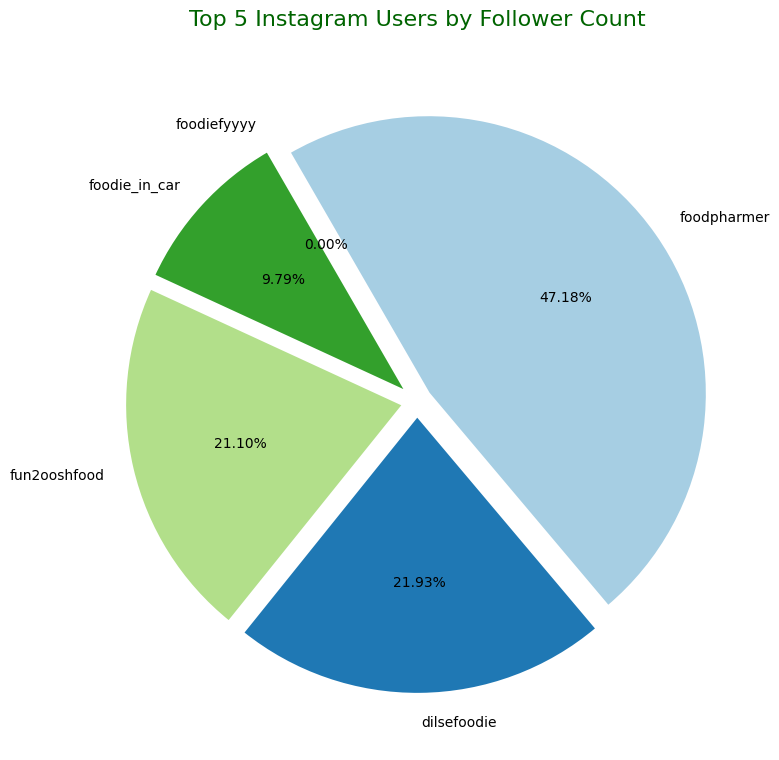

In [42]:
# Depict this information using a suitable graph.
# Pie Graph just to get the idea which user_handle has more followers.

import matplotlib.pyplot as plt

# Extract counts and user IDs
count = list(Top_5_followed_user.values())
userId = list(Top_5_followed_user.keys())

# Plot
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Use a visually pleasant colormap
explode = [0.05] * len(userId)  # Slightly explode each slice for emphasis

plt.pie(
    count,
    labels=userId,
    autopct="%.2f%%",
    startangle=120,
    counterclock=False,
    explode=explode,
    colors=colors,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)

plt.title('Top 5 Instagram Users by Follower Count', fontsize=16, color='darkgreen', pad=20)
plt.tight_layout()
plt.show()


# 2. Now Find the number of posts these handles have done in the previous 3 days.


In [46]:

def Number_of_Post(user_url, No_of_Days):
    driver.get(user_url)
    sleep(2)

    # Click on the first post
    try:
        First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_aagw")))
        First_Post.click()
    except Exception as e:
        print(f"[ERROR] Couldn't open first post for {user_url} → {e}")
        return 0

    no_of_post = 0
    max_loops = 50  # safety cap

    for _ in range(max_loops):
        try:
            # Grab time from post without relying on class names
            post_time_element = wait.until(EC.presence_of_element_located((By.XPATH, '//time')))
            time_of_post = post_time_element.get_attribute('datetime')

            if not time_of_post:
                print("[INFO] No datetime attribute found, breaking...")
                break

            date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
            if (datetime.now() - date_of_post).days > No_of_Days:
                break
            else:
                no_of_post += 1

            # Move to next post
            next_button = wait.until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class,"_aaqg")]/button')))
            next_button.click()
            sleep(2)

        except (TimeoutException, NoSuchElementException) as e:
            print(f"[STOP] Could not find time or next button → {e}")
            break

    driver.back()
    return no_of_post
    
no_of_post_per_user = {}
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    Post_count = Number_of_Post(user_url, 3)
    no_of_post_per_user[Id] = Post_count

# Display results
for ID, Count in no_of_post_per_user.items():
    print(ID, '----->', Count, 'Posts')


foodpharmer -----> 0 Posts
dilsefoodie -----> 0 Posts
fun2ooshfood -----> 0 Posts
foodie_in_car -----> 0 Posts
foodiefyyyy -----> 0 Posts


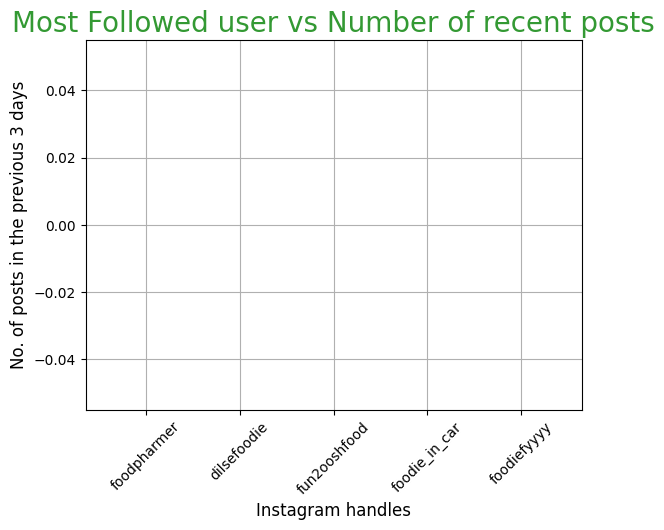

In [48]:
# Data from the 'no_of_post_per_user' dictionary
x = no_of_post_per_user.keys()  # Instagram handles
y = no_of_post_per_user.values()  # Number of posts in the last 3 days

# Creating the bar chart
plt.bar(x, y, color='g', alpha=0.7)

# Labeling the axes and title
plt.ylabel("No. of posts in the previous 3 days", size=12)
plt.xlabel("Instagram handles", size=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Most Followed user vs Number of recent posts', fontsize=20, color='green', alpha=0.8)

# Display grid lines for better clarity
plt.grid()

# Show the chart
plt.show()


# Problem 2 :
Your friend also needs a list of hashtags that he should use in his posts.

# 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [57]:
"""
To answer this question I have made a function named content_of_post it takes two arguments:
1. profile link
2. no. of post
This function is suitable for extracting the content of n number of posts and this function will return a list of 
text extracted from each post.

In this function firstly I click on the first post extract all the content and move to the next post. 
In this, my friend wants the list of Hashtags so I extract only hashtags rather than all the words, 
there is no means to extract all the words.

And I collect all the text for 10 posts corresponding to their user and store them in a dictionary key as user id and values as a list of words.

"""

def content_of_post(user_url, No_of_post):
    Text_list = []
    driver.get(user_url)
    sleep(2)
    
    try:
        First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_aagw")))
        First_Post.click()
    except:
        print("Couldn't click on the first post.")
        return Text_list

    no_of_post = 0
    while True:
        try:
            # Get entire page source
            page_source = driver.page_source
            soup = BeautifulSoup(page_source, 'html.parser')

            # Try to find h1 caption with hashtags inside
            caption = soup.find('h1')
            if caption:
                hashtags = caption.find_all('a')
                for tag in hashtags:
                    if tag.text.startswith('#'):
                        Text_list.append(tag.text)
            else:
                print("Caption not found.")

            no_of_post += 1
            if no_of_post == No_of_post:
                break

            try:
                Next_post = wait.until(EC.element_to_be_clickable((By.XPATH, '//div[@class=" _aaqg _aaqh"]/button')))
                Next_post.click()
                sleep(2)
            except:
                print("Next post not found or not clickable.")
                break

        except Exception as e:
            print("Error while processing post:", e)
            break

    driver.back()
    return Text_list


# extract all the list of text of top 5 user which I get in previous qes and store them in list for further requirments
words_of_5_user = []
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    text_list = content_of_post(user_url,10)
    words_of_5_user.extend(text_list)
    print(Id,'--->',text_list)
    print()

foodpharmer ---> ['#ConsciousCapitalism', '#Positive', '#EffectiveAltruism', '#LabelPadhegaIndia', '#FoodPharmer', '#LabelPadhegaIndia', '#LabelPadhegaIndia', '#LabelPadhegIndia', '#LabelPadhegaIndia']

dilsefoodie ---> ['#dilsefoodie', '#food', '#chicken', '#mutton', '#streetfood', '#jaipur', '#dilsefoodie', '#food', '#afeemhandi', '#omelette', '#streetfood', '#dilsefoodie', '#food', '#streetfood', '#foodfood', '#dilsefoodie', '#food', '#shakesquare', '#streetfood', '#kamlanagar', '#connaughtplace', '#dilsefoodie', '#food', '#chaat', '#streetfood', '#food', '#dilsecouple', '#dilsefoodie', '#food', '#dahikesholey', '#ina', '#food', '#streetfood', '#dilsefoodie', '#food', '#streetfood', '#dilsecouple', '#bombaybhelhouse', '#kamlanagar', '#dilsefoodie', '#food', '#travel', '#chicken', '#vegetarian', '#camera', '#dilsefoodie', '#food', '#mutton', '#chicken', '#dhabafood', '#dilsefoodie', '#food', '#poori', '#breakfast', '#panipat']

fun2ooshfood ---> ['#Award', '#AwardWinning', '#Influenc

# 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [58]:
"""
Here I made a function to get the frequency of each word, In this function, it takes only one argument 
1. List of words, returns dictionary having word and corresponding frequencies
I calculate the frequency of each word and store them for further requirements I got the list of words from
previous question.

"""

def get_word_frequency(List_of_words):
    dct = {}
    words_list = []
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

# calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'#ConsciousCapitalism': 1,
 '#Positive': 1,
 '#EffectiveAltruism': 1,
 '#LabelPadhegaIndia': 4,
 '#FoodPharmer': 1,
 '#LabelPadhegIndia': 1,
 '#dilsefoodie': 10,
 '#food': 21,
 '#chicken': 3,
 '#mutton': 2,
 '#streetfood': 8,
 '#jaipur': 1,
 '#afeemhandi': 1,
 '#omelette': 1,
 '#foodfood': 1,
 '#shakesquare': 1,
 '#kamlanagar': 2,
 '#connaughtplace': 1,
 '#chaat': 1,
 '#dilsecouple': 2,
 '#dahikesholey': 1,
 '#ina': 1,
 '#bombaybhelhouse': 1,
 '#travel': 1,
 '#vegetarian': 2,
 '#camera': 1,
 '#dhabafood': 1,
 '#poori': 1,
 '#breakfast': 1,
 '#panipat': 1,
 '#Award': 2,
 '#AwardWinning': 1,
 '#InfluencerAward': 1,
 '#FoodCreator': 1,
 '#Fun2ooshFood': 10,
 '#InfluencerAwards': 1,
 '#FoodBloggerOfTheYear': 1,
 '#FoodBlogger': 1,
 '#Entrepreneur': 1,
 '#FoodContentCreator': 8,
 '#FoodBloggerLife': 8,
 '#Tadka': 1,
 '#Dahi': 1,
 '#Curd': 1,
 '#TadkaDahi': 1,
 '#DahiTadka': 1,
 '#DahiLover': 1,
 '#PunjabiTadka': 1,
 '#DesiTadka': 1,
 '#Yogurt': 1,
 '#TraditionalFood': 1,
 '#IndianFood': 2,

# 3.Create a csv file with two columns : the word and its frequency

In [59]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe 
df = pd.DataFrame(columns)

#using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

# Printing the Top 10 Row of the table
df.head(10)

,Word,Frequency
0,#ConsciousCapitalism,1
1,#Positive,1
2,#EffectiveAltruism,1
3,#LabelPadhegaIndia,4
4,#FoodPharmer,1
5,#LabelPadhegIndia,1
6,#dilsefoodie,10
7,#food,21
8,#chicken,3
9,#mutton,2


# 4. Now, find the hashtags that were most popular among these bloggers


In [60]:
"""
To answer this question I have made a function that sorts the given dictionary by values
I call this function by passing the word frequency dictionary and got sorted words by frequency
Through this function I got to know that #foodies and #food is the most popular among the 5 bloggers, this can be changed over time.
"""
def sort_by_value(Dict):
    sorted_data = [[value,key] for key,value in Dict.items()]
    sorted_data.sort(reverse=True)
    return sorted_data

# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = sort_by_value(word_freq_dict)

# top hashtags
for i in hastag_with_frequency:
    print(i[1],'-->',i[0],'Hashtags')

#food --> 21 Hashtags
#dilsefoodie --> 10 Hashtags
#Fun2ooshFood --> 10 Hashtags
#foodporn --> 9 Hashtags
#delicious --> 9 Hashtags
#asmrcommunity --> 9 Hashtags
#asmr --> 9 Hashtags
#viral --> 8 Hashtags
#streetfood --> 8 Hashtags
#mahindra --> 8 Hashtags
#love --> 8 Hashtags
#instagood --> 8 Hashtags
#instafood --> 8 Hashtags
#foodstagram --> 8 Hashtags
#foodieincar --> 8 Hashtags
#asmreating --> 8 Hashtags
#FoodContentCreator --> 8 Hashtags
#FoodBloggerLife --> 8 Hashtags
#homemade --> 7 Hashtags
#foodie --> 7 Hashtags
#asmrvideos --> 7 Hashtags
#asmrvideo --> 7 Hashtags
#asmrsounds --> 7 Hashtags
#asmrfood --> 7 Hashtags
#RecipeCreator --> 7 Hashtags
#QuickRecipes --> 7 Hashtags
#EasyRecipe --> 7 Hashtags
#yummy --> 6 Hashtags
#foodphotography --> 6 Hashtags
#foodlover --> 6 Hashtags
#foodblogger --> 6 Hashtags
#healthyfood --> 5 Hashtags
#foodpics --> 5 Hashtags
#foodgasm --> 5 Hashtags
#follow --> 5 Hashtags
#tasty --> 4 Hashtags
#restaurant --> 4 Hashtags
#pizza --> 4 Hashtags
#

# 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

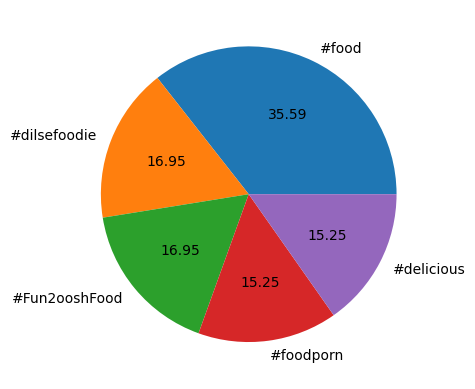

In [61]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()

# Probem 3 :
You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:


# 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [80]:
"""
To find Likes of the top 10 posts of handles I made a function named Likes_of_post it takes two arguments
1. profile link
2. Number of posts of which users want to know the total likes
This function is suitable for n number of posts. I put 5 handles in function one by one which I found earlier and 
find out the likes of the top 10 posts. print them
"""

def Likes_of_post(user_url, No_of_post):
    from selenium.common.exceptions import TimeoutException, NoSuchElementException
    Totel_Likes = 0
    driver.get(user_url)
    sleep(2)

    try:
        First_Post = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_aagw")))
        First_Post.click()
    except Exception as e:
        print(f"❌ Could not open first post for {user_url.split('/')[-2]}: {e}")
        return 0

    no_of_post = 0
    while no_of_post < No_of_post:
        try:
            try:
                like_element = wait.until(EC.presence_of_element_located(
                    (By.XPATH, '//a[contains(@href, "/liked_by/")]/span/span')
                ))
                likes = int(like_element.text.replace(",", "").strip())
            except:
                view_element = wait.until(EC.presence_of_element_located(
                    (By.XPATH, '//span[contains(text(), " views") or contains(text(), " Views")]')
                ))
                likes = int(view_element.text.replace(",", "").replace(" views", "").strip())

            Totel_Likes += likes

        except Exception:
            # Silently ignore post if likes/views can't be extracted
            break

        no_of_post += 1

        try:
            next_button = wait.until(EC.element_to_be_clickable(
                (By.XPATH, '//div[contains(@class, "_aaqg")]/button')
            ))
            next_button.click()
            sleep(2)
        except Exception:
            break  # Just exit cleanly if no next button

    driver.back()
    return Totel_Likes

print("\n---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
for user, likes in sorted(Total_likes_of_user.items(), key=lambda x: x[1], reverse=True):
    print(f"{user} ---> {likes}\n")



---------------------------------
Total Likes for 10 Posts
---------------------------------
foodpharmer ---> 2458235

dilsefoodie ---> 1481807

fun2ooshfood ---> 689885

foodie_in_car ---> 572882

foodiefyyyy ---> 207



# 2.Calculate the average likes for a handle.

In [83]:
'''
I have made a function named get_avg_likes to calculate average likes this function will take two argument
1. Total Likes per user
2. Number of Posts
'''
def get_avg_likes(Total_Likes,Number_of_Post):
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

# calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = get_avg_likes(Total_Likes,10)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

---------------------------------
Average Likes
---------------------------------
foodpharmer ----> 245824
dilsefoodie ----> 148181
fun2ooshfood ----> 68988
foodie_in_car ----> 57288
foodiefyyyy ----> 21


# 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [84]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in Top_5_handle:
    avg_followers_count = int(Top_5_followed_user[ID]/average_likes_dict[ID])
    avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodpharmer ----> 11 : 245823
dilsefoodie ----> 8 : 148180
fun2ooshfood ----> 18 : 68988
foodie_in_car ----> 10 : 57288
foodiefyyyy ----> 2 : 20


# 4.Create a bar graph to depict the above obtained information.

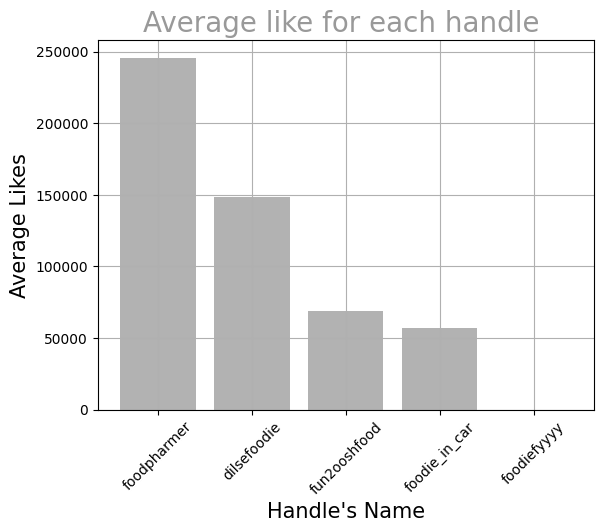

In [90]:
#for this I will use answer of problem 3.2 
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='gray',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='gray',alpha=0.8)
plt.grid()
plt.show()

# Plotting Bar Graph for average followers:like ratio of each handle

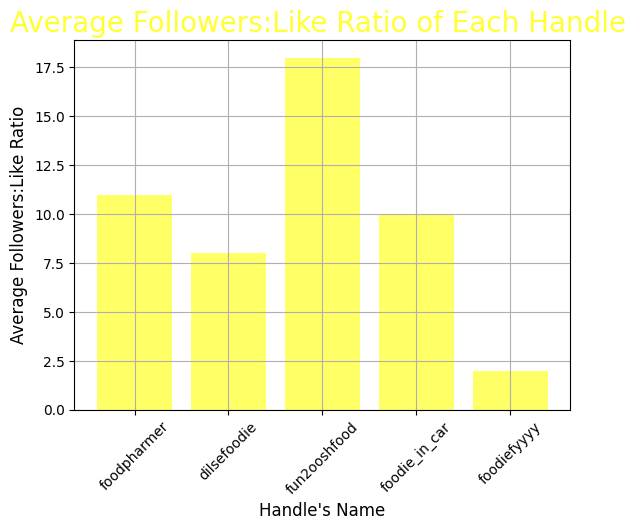

In [89]:
#For this I will use answer of problem 3.3
username = list(avg_followers.keys())
avg_like = list(avg_followers.values())

plt.bar(username,avg_like,color='Yellow',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 45)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Yellow',alpha=0.8)
plt.grid()
plt.show()

In [91]:
driver.close()